# Data Analytics - Test Task

## Setup

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
def apply_table_styling(df):
    styled_df = df.style.set_table_styles([
        {
            'selector': 'th',
            'props': [('text-align', 'left')]
        },
        {
            'selector': '',
            'props': [('text-align', 'left'), ('white-space', 'pre-wrap')]
        }
    ])
    return styled_df

In [4]:
count_of_deposits_color = 'magenta'
deposit_amount_color = 'blue'
user_activity_color = 'green'

In [5]:
def create_overview(df, x_value, y_and_avg_value, width, avg_label, title, bar_color, rotate=0, height=6):
    average_value = df[y_and_avg_value].mean()
    
    fig, ax = plt.subplots(figsize=(width, height))
    ax = df.plot(kind='bar', x=x_value, y=y_and_avg_value, legend=False, ax=ax, color=bar_color)
    ax.axhline(y=average_value, color='r', linestyle='--', label=avg_label, alpha=0.5)
    ax.set_title(title, fontsize=24)

    for index, value in enumerate(df[y_and_avg_value]):
        ax.text(index, value, str(value), ha='center', va='bottom', rotation=rotate)

    plt.legend()
    plt.show()

In [6]:
def round_rows_in_dataframe(df, rows_to_round):
    def round_numeric(x):
        if isinstance(x, (int, float)):
            return round(x, 2)
        return x

    for row_index in rows_to_round:
        df.iloc[row_index] = df.iloc[row_index].apply(round_numeric)

In [7]:
def create_bar_chart(df, row_index, title, bar_color):
    y_values = df.iloc[row_index, 1:].values
    x_labels = df.columns[1:]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = plt.bar(x_labels, y_values, color=bar_color, width=0.4)
    ax.set_title(title, fontsize=18)

    for bar, value in zip(bars, y_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{value:.2f}', ha='center')

    plt.show()

In [8]:
def read_file(pd, sheet_nr):
    return pd.read_excel('..\\Data_Analytics\\Data Analytics - Test Task.xlsx',  sheet_name=sheet_nr)

## Monthly Overview

This table shows a monthly overview where each day shows count of deposits, deposit amount and user activity. For better data readability there are 3 graphics accordingly.

There are the major drop in 21.09 date with the lowest result in all of given graphs
and the spike date with the highest result is 23.09.

It could be possible that the drop was due to some global technical issues or some maintenance or some kind of inventorization, because this date is totally empty in all affiliates and countries. Same for the spike date, it is present in all of the affiliates and countrys, and the reason could be some sort of the game promotion to regain the loss of the empty date(21.09) and potentially earn more.

In [9]:
df = read_file(pd, 1)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [11]:
apply_table_styling(df)

,Date,Deposit count,Deposit amount sum (EUR),User count
0,2022-09-01,12,1610,12
1,2022-09-02,10,1300,10
2,2022-09-03,8,780,8
3,2022-09-04,8,930,8
4,2022-09-05,8,820,8
5,2022-09-06,11,1140,11
6,2022-09-07,13,1660,13
7,2022-09-08,14,1640,14
8,2022-09-09,9,1310,9
9,2022-09-10,8,1310,8


### Count of Deposits

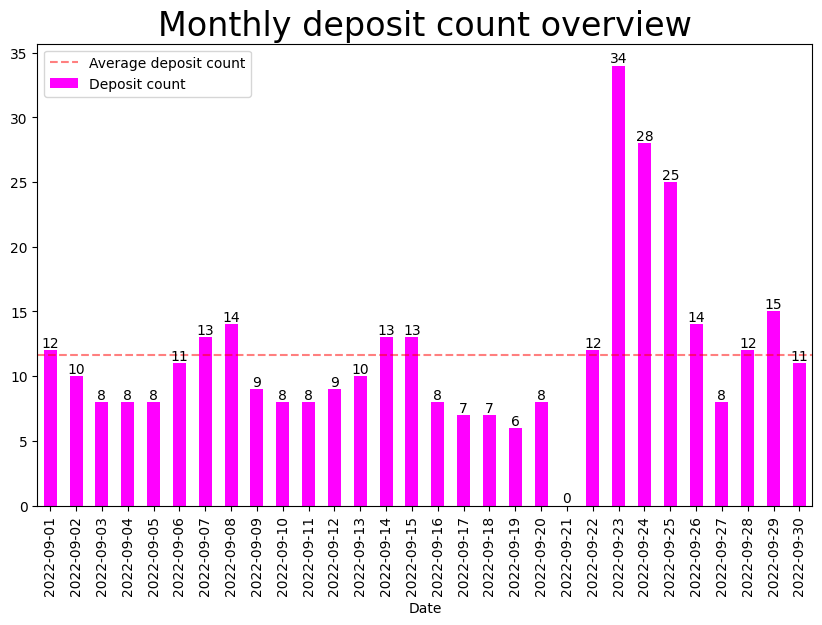

In [12]:
create_overview(df, "Date", 'Deposit count', 10, 'Average deposit count', 
                'Monthly deposit count overview', count_of_deposits_color)

### Deposit Amount in EUR

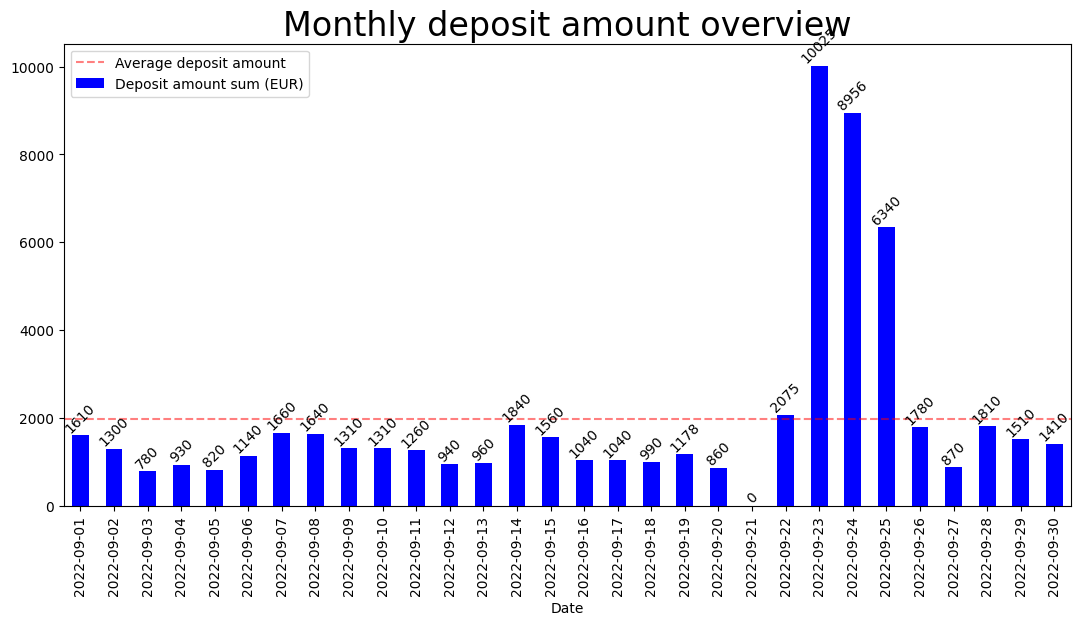

In [13]:
create_overview(df, "Date", 'Deposit amount sum (EUR)', 13, 'Average deposit amount', 
                'Monthly deposit amount overview', deposit_amount_color, 45)

### User activity

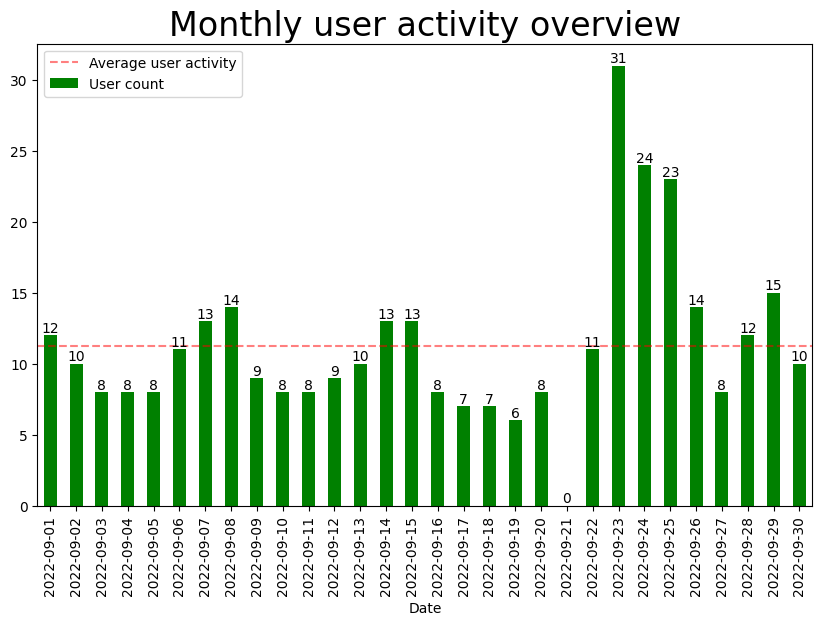

In [14]:
create_overview(df, "Date", 'User count', 10, 'Average user activity', 
                'Monthly user activity overview', user_activity_color)

### Workdays and Weekends

I split the month into working days and weekends, to see how active the users are. The table is in three sections: count of deposits, deposit amount and user activity.

If we look at the average user activity and count of the deposits they make, the numbers are close to each other, although the average deposit amount in the weekends is quite bigger than in workdays.

It could be because all of the weekend days were active and the user deposit amount was slightly larger than on the working days.

In [15]:
df = read_file(pd, 2)

rows_to_round = [3, 10, 17]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,Workday,Weekend
0,Day count,22,8
1,---,---,---
2,Deposit count sum,250,99
3,Average count,11.36,12.38
4,Above average,10,2
5,Below average,12,6
6,Max count,34,28
7,Min count,0,7
8,---,---,---
9,Deposit amount sum (EUR),37338,21606


## Weekley Overview

### Days of the week

This table shows the data grouped in the days of the week from monday to sunday. For better data readability there are 3 graphics with the average value of deposit count, deposit amount in euros and user activity.

Overall the most profitable and active days are mostly visible on thursdays, fridays and saturdays. It could be possible that there are some game events and/or promotions closer to the end of the week which in this month would be more profitable, because there are 5 thursdays and fridays which brings more active users.

In [16]:
df = read_file(pd, 4)

rows_to_round = [3, 8, 13]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Day count,4,4,4,5,5,4,4
1,---,---,---,---,---,---,---,---
2,Deposit count sum,37,37,38,66,72,51,48
3,Average count,9.25,9.25,9.5,13.2,14.4,12.75,12
4,Max count,14,11,13,15,34,28,25
5,Min count,6,8,0,12,8,7,7
6,---,---,---,---,---,---,---,---
7,Deposit amount sum (EUR),4718,3830,5310,8395,15085,12086,9520
8,Average amount (EUR),1179.5,957.5,1327.5,1679,3017,3021.5,2380
9,Max amount (EUR),1780,1140,1840,2075,10025,8956,6340


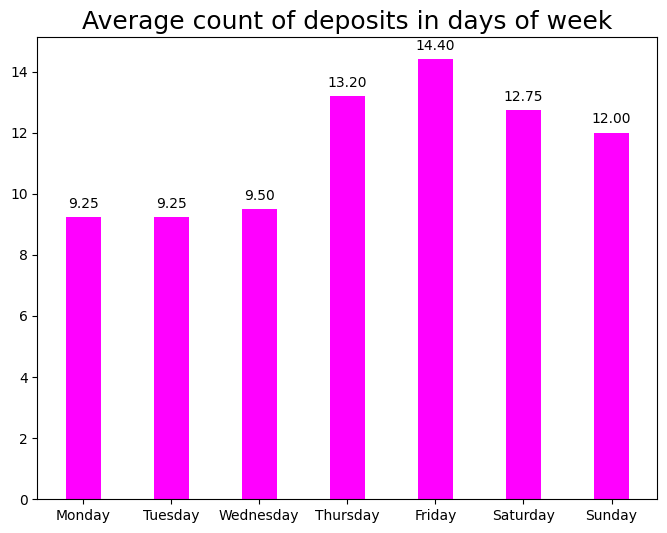

In [17]:
create_bar_chart(df, 3, 'Average count of deposits in days of week', count_of_deposits_color)

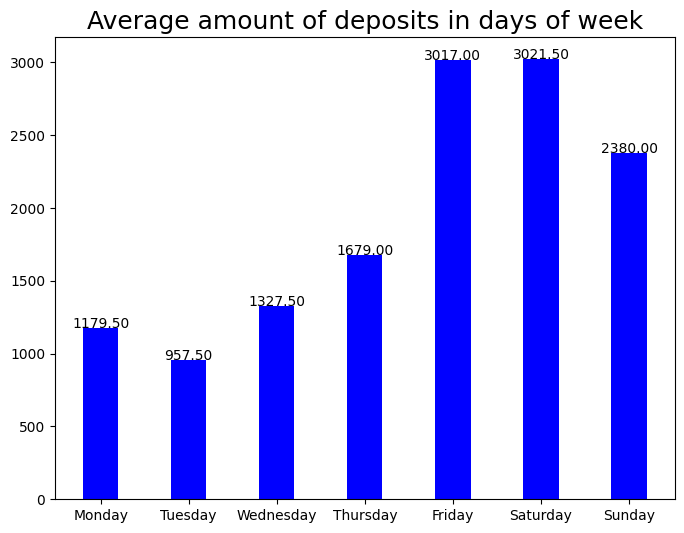

In [18]:
create_bar_chart(df, 8, 'Average amount of deposits in days of week', deposit_amount_color)

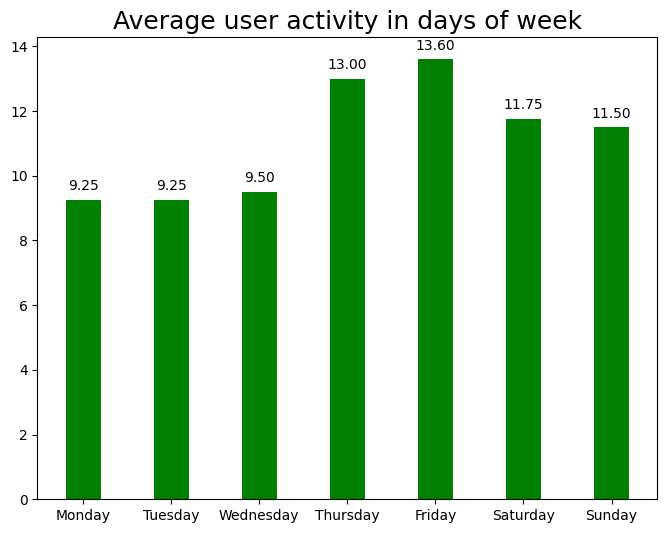

In [19]:
create_bar_chart(df, 13, 'Average user activity in days of week', user_activity_color)

### Weeks

Here is visible the weekly overview like it would be in the calendar.
In this month in total there is a 5 week spread where only the 3 of them are with all 7 days(2nd, 3rd and 4th week). The shortest is the 1st week with 4 days. The 5th week has 5 days.

For better data readability there are 3 graphics with the average value of deposit count, deposit amount in euros and user activity.

The most profitable week was the 4th one. It could be due to the fact that in this week there was the drop date(21.09) soon after which was followed by the spike date(23.09), which are visible in the monthly overview.

And the 1st week although was the shortest has the average calculations with the same height as the 2nd and 3rd week.

In [20]:
df = read_file(pd, 5)

rows_to_round = [1, 6, 11]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,1st week (01-04),2nd week (05-11),3rd week (12-18),4th week (19-25),5th week (26-30)
0,Deposit count sum,38,71,67,113,60
1,Average count,9.5,10.14,9.57,16.14,12
2,Max count,12,14,13,34,15
3,Min count,8,8,7,0,8
4,---,---,---,---,---,---
5,Deposit amount sum (EUR),4620,9140,8370,29434,7380
6,Average amount (EUR),1155,1305.71,1195.71,4204.86,1476
7,Max amount (EUR),1610,1660,1840,10025,1810
8,Min amount (EUR),780,820,940,0,870
9,---,---,---,---,---,---


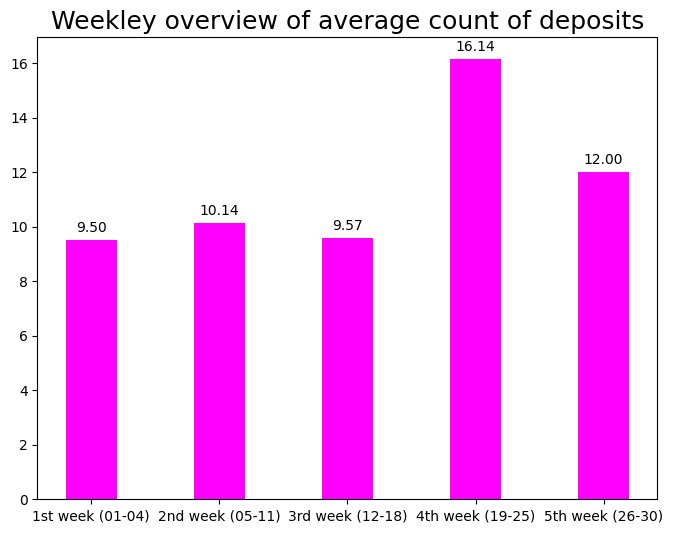

In [21]:
create_bar_chart(df, 1, 'Weekley overview of average count of deposits', count_of_deposits_color)

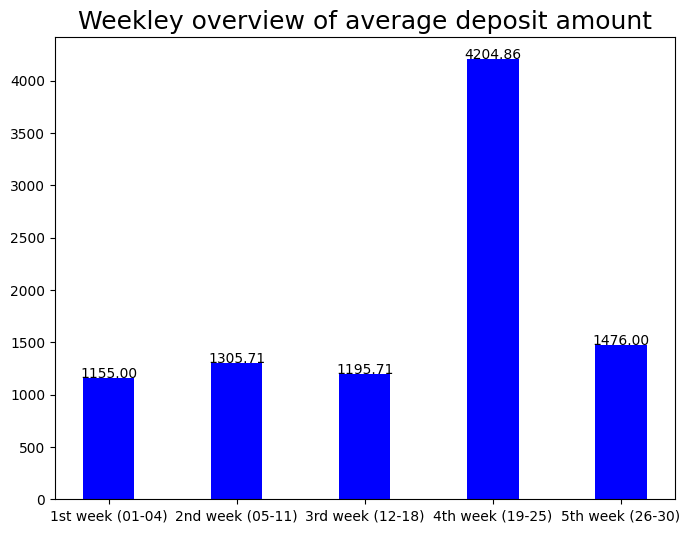

In [22]:
create_bar_chart(df, 6, 'Weekley overview of average deposit amount', deposit_amount_color)

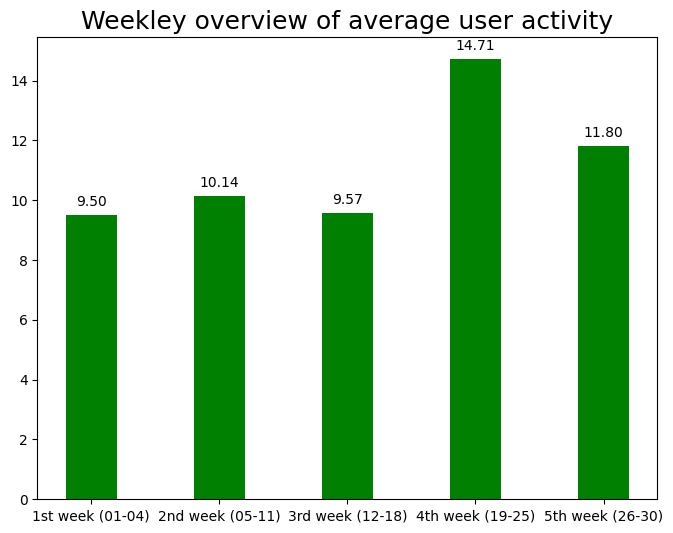

In [23]:
create_bar_chart(df, 11, 'Weekley overview of average user activity', user_activity_color)

## 24 Hour Overview

This table shows an hourly overview where each hour shows count of deposits, deposit amount and user activity. For better data readability there are 3 graphics accordingly.

The most active hour is at 7pm, probably that is after the day job. And the least active is at 2am. Overall the user activity is all day and night cycle long.

In [24]:
df = read_file(pd, 6)

df['Time'] = df['Time'].apply(lambda x: x.strftime('%H:%M'))

apply_table_styling(df)

,Time,Deposit count,Deposit sum(EUR),User count
0,00:00,3,400,4
1,01:00,2,370,2
2,02:00,3,350,3
3,03:00,6,3235,4
4,04:00,4,1020,4
5,05:00,10,1130,10
6,06:00,6,840,5
7,07:00,7,1001,6
8,08:00,4,400,4
9,09:00,33,4610,24


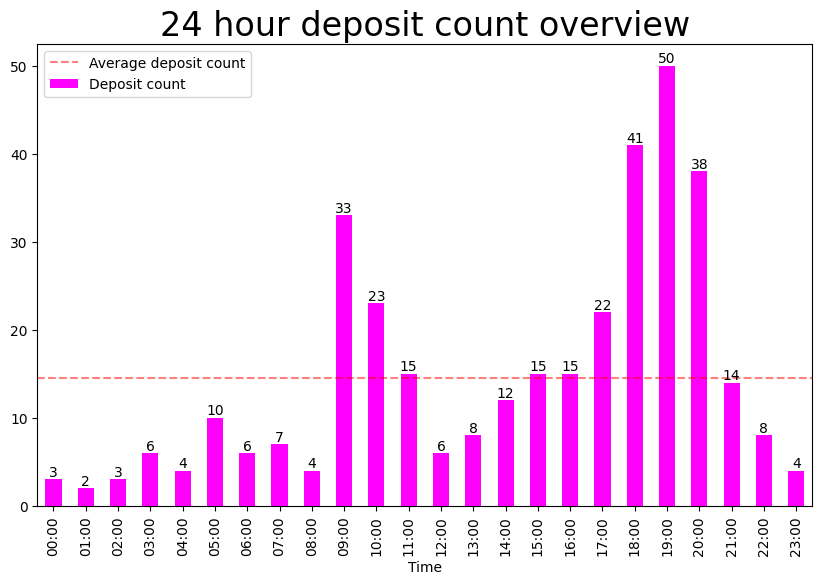

In [25]:
create_overview(df, "Time", 'Deposit count', 10, 'Average deposit count',
                 '24 hour deposit count overview', count_of_deposits_color)

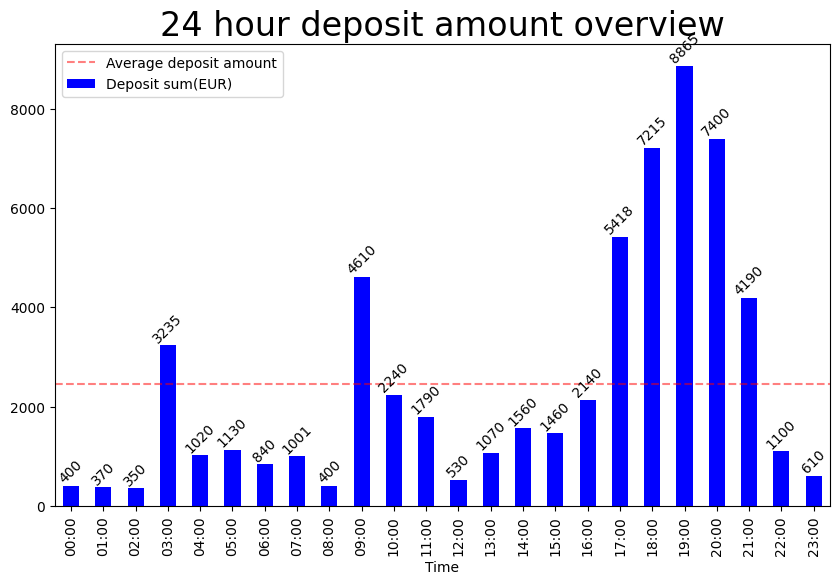

In [26]:
create_overview(df, "Time", 'Deposit sum(EUR)', 10, 'Average deposit amount',
                 '24 hour deposit amount overview', deposit_amount_color, 45)

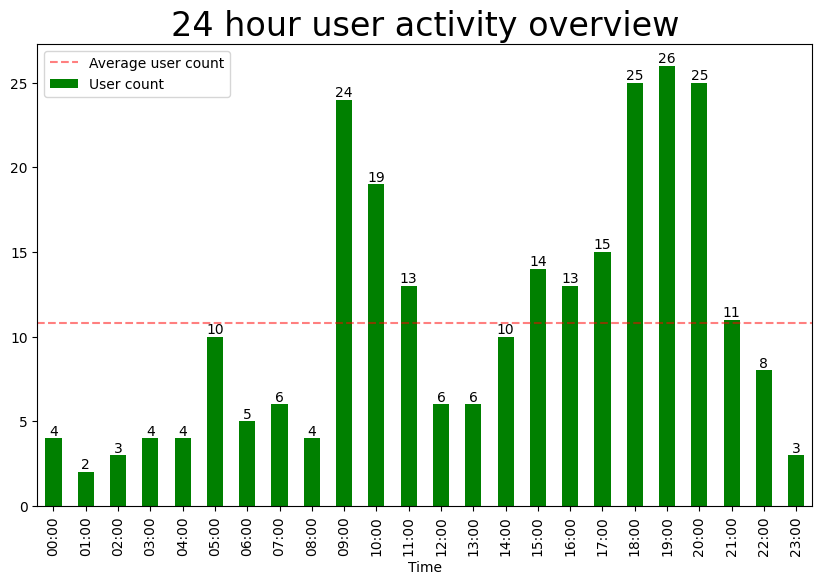

In [27]:
create_overview(df, "Time", 'User count', 10, 'Average user count',
                 '24 hour user activity overview', user_activity_color)

### Periods of a day

Here the data is grouped within the day and night cycle periods from morning to night. For better data readability there are 3 graphics with the average value of deposit count, deposit amount in euros and user activity.

The most active period of the day is evening(5pm - 9pm), probably because it is the end time for the day job. And the least active is night(9pm-5am).

In [28]:
df = read_file(pd, 7)

rows_to_round = [1, 6, 11]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,Morning (5am - 12pm),Afternoon (12pm - 5pm),Evening (5pm - 9pm),Night (9pm - 5am)
0,Deposit count sum,98,56,151,44
1,Average count,14,11.2,37.75,5.5
2,Max count,33,15,50,14
3,Min count,4,6,22,2
4,---,---,---,---,---
5,Deposit amount sum(EUR),12011,6760,28898,11275
6,Average amount sum(EUR),1715.86,1352,7224.5,1409.38
7,Max deposit sum(EUR),4610,2140,8865,4190
8,Min deposit sum(EUR),400,530,5418,350
9,---,---,---,---,---


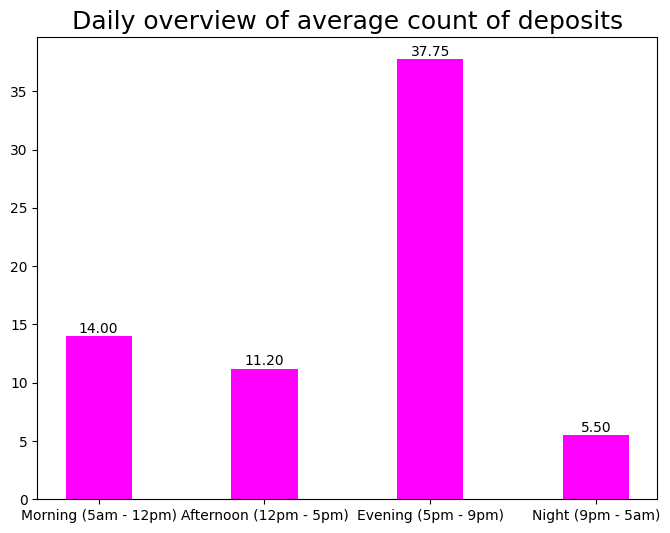

In [29]:
create_bar_chart(df, 1, 'Daily overview of average count of deposits', count_of_deposits_color)

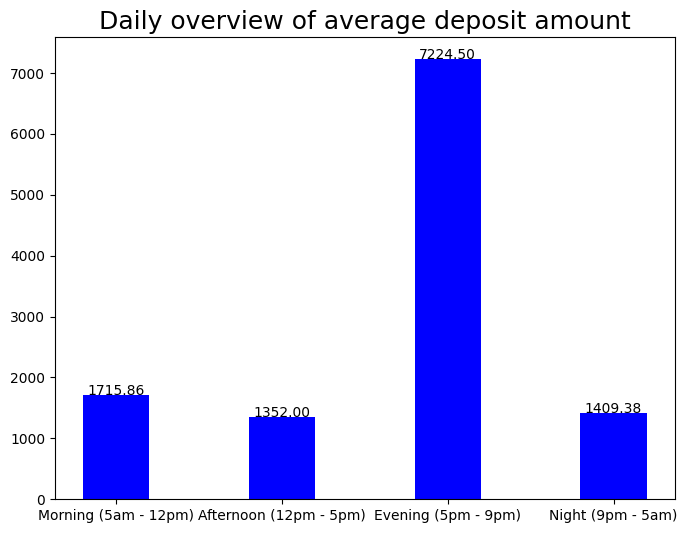

In [30]:
create_bar_chart(df, 6, 'Daily overview of average deposit amount', deposit_amount_color)

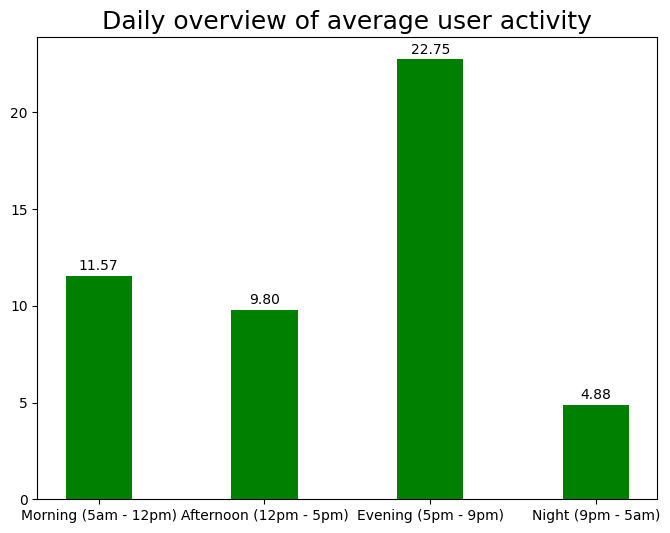

In [31]:
create_bar_chart(df, 11, 'Daily overview of average user activity', user_activity_color)

## User Deposit Overview

This table shows a user activity overview with each user's count of deposits and deposit amount in euros. For better data readability there are 2 graphics accordingly.

Also there are extra two tables, each as an overview of the graphs. They show the max and min value, how many users are with this value and the respective user id.
Also these tables show the average value and the user count above and below that average.

In [32]:
df = read_file(pd, 8)
apply_table_styling(df)

,UserID,Total deposit count,Deposit sum (EUR)
0,1230,11,1150
1,1231,9,1050
2,1232,11,1500
3,1233,10,1701
4,1234,31,22758
5,1235,10,1150
6,1236,10,1300
7,1237,9,1200
8,1238,10,1200
9,1239,10,1100


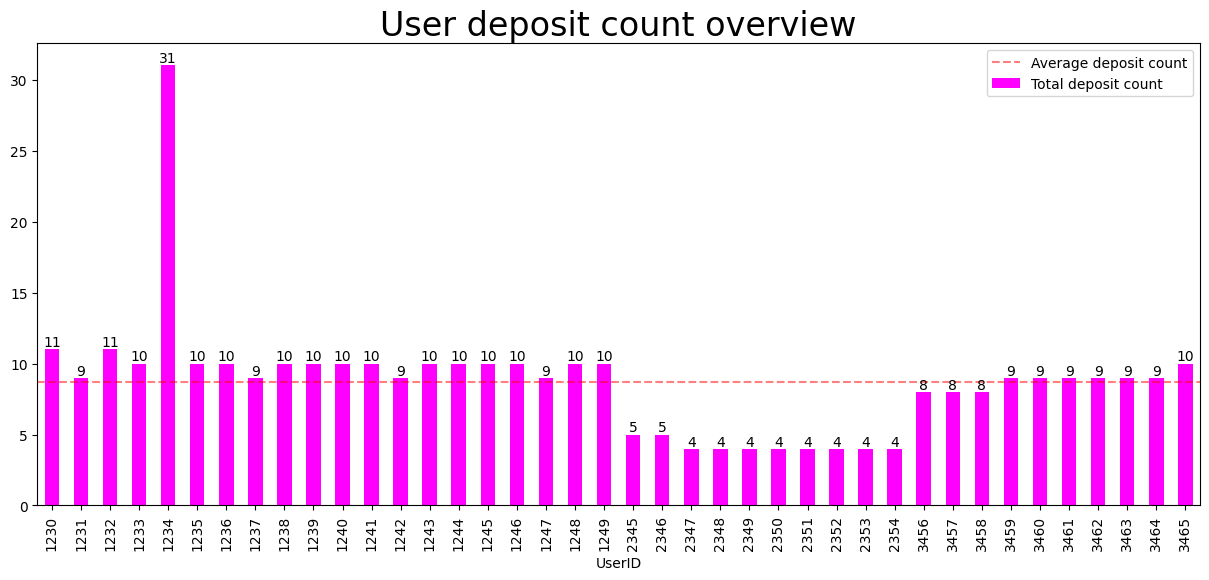

In [33]:
create_overview(df, "UserID", 'Total deposit count', 15, 'Average deposit count',
     			'User deposit count overview', count_of_deposits_color)

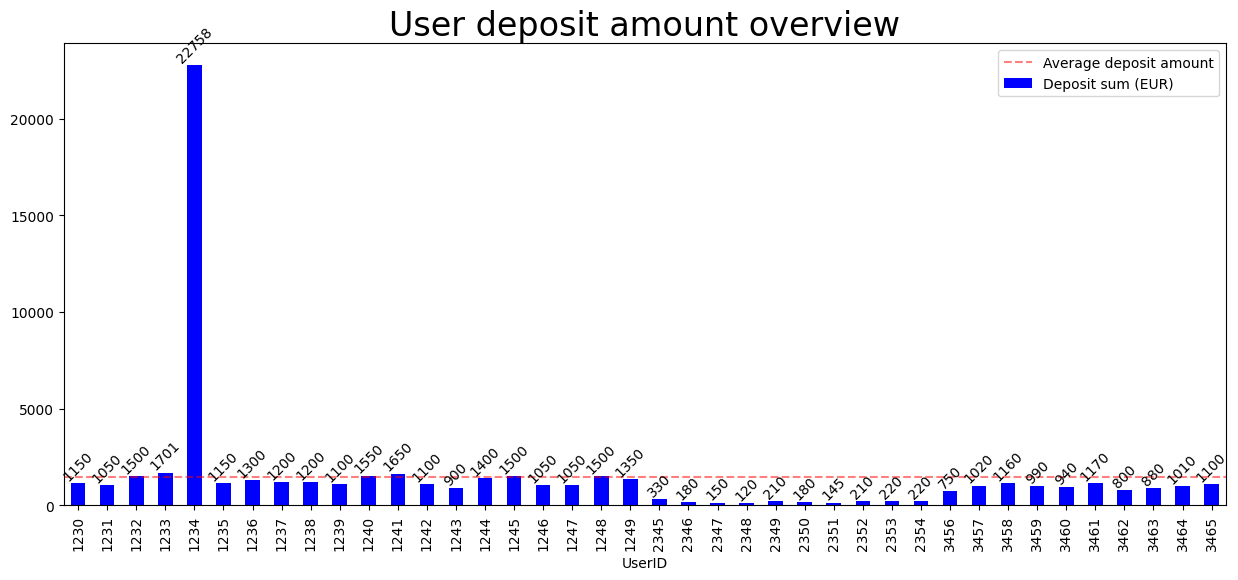

In [34]:
create_overview(df, "UserID", 'Deposit sum (EUR)', 15, 'Average deposit amount',
     			'User deposit amount overview', deposit_amount_color, 45)

### Count of deposits

In [35]:
df = read_file(pd, 9)

rows_to_round = [15]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,Result
0,Max count of deposits,31
1,User count,1
2,UserID with max deposit count,1234
3,---,---
4,Min count of deposits,4
5,User count,8
6,UserID with min deposit count,2347
7,,2348
8,,2349
9,,2350


### Deposit amount in EUR

In [36]:
df = read_file(pd, 10)

rows_to_round = [8]
round_rows_in_dataframe(df, rows_to_round)
    
display(df)

,,Result
0,Max deposit amount(EUR),22758
1,User count,1
2,UserID with max deposit amount,1234
3,---,---
4,Min deposit amount(EUR),120
5,User count,1
6,UserID with min deposit amount,2348
7,---,---
8,Average deposit amount(EUR),1473.6
9,User count above average,7


### Comparison of deposit amount and count of deposit average

This table shows how many users above/below the average deposit amount are with above and below the average count of deposits.
The average values are from two above tables (average deposit amount: 1473.6 and average count of deposits: 8.72)

The row nr. 0 and 1 shows users whose deposit amount is above the average. All of these users make more deposits than the average count of deposits.
The row nr. 3 and 4 shows users whose deposit amount is below the average. 13 of them deposit less than the average count of deposits, but 20 deposit above average.

That means that from all 40 users 27 of them can afford to deposit more than 8 times in a month and 7 of them deposit amount sum above 1473 EUR in a month.

In [37]:
df = read_file(pd, 11)
apply_table_styling(df)

,,User count
0,dep. a. > avg but count of dep. < avg,0
1,dep. a. > avg and count of dep. > avg,7
2,---,---
3,dep. a. < avg and count of dep. < avg,13
4,dep. a. < avg but count of dep. > avg,20


## Country Overview

There are three tables for each country. There you can see all the affiliates in that country and for each of those affiliates there is the count of deposits, deposit amount and user count. And in the last row of each table there is the sum of all the data.

### Sweden

In [38]:
df = read_file(pd, 12)
apply_table_styling(df)

,Sweden affiliates,Deposit count,Deposit amount sum(EUR),User count
0,123,150,37709,13
1,124,39,5200,4
2,125,30,4250,3
3,Sum,219,47159,20


### Estonia

In [39]:
df = read_file(pd, 13)
apply_table_styling(df)

,Estonia affiliates,Deposit count,Deposit amount sum(EUR),User count
0,123,14,660,3
1,124,28,1305,7
2,Sum,42,1965,10


### Finland

In [40]:
df = read_file(pd, 14)
apply_table_styling(df)

,Finland affiliates,Deposit count,Deposit amount sum(EUR),User count
0,123,42,4860,5
1,125,46,4960,5
2,Sum,88,9820,10


## Affiliate Overview

This table shows the sum of the count of deposits, deposit amount and user count in each affiliate.

The affiliate 123 has the highest count of deposits, deposit amount and the most users, because this affiliate is in all of the countries provided by data. That can be seen in the country overview.

In [41]:
df = read_file(pd, 15)
apply_table_styling(df)

,Affiliate,Count of deposits,Deposit amount sum(EUR),User count
0,123,206,43229,21
1,124,67,6505,11
2,125,76,9210,8
